# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [49]:
app_train = pd.read_csv("application_train.csv")
app_train.head()
app_train = app_train.loc[:, ["CNT_CHILDREN", "TARGET", "AMT_INCOME_TOTAL"]]

# 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩 --> Group 0 
    * 有 1 - 2 個小孩 --> Group 1
    * 有 3 - 5 個小孩 --> Group 2 
    * 有超過 5 個小孩 --> Group 3 

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [81]:
#1
cut_rule = [-1, 0.9, 2.1, 5.1,100]
app_train["CNT_CHILDREN_GROUP"] = 0
app_train["CNT_CHILDREN_Cate"] = pd.cut(app_train.CNT_CHILDREN, cut_rule)
for i,v in enumerate(app_train.CNT_CHILDREN_Cate.unique()):
    app_train.CNT_CHILDREN_GROUP[app_train.CNT_CHILDREN_Cate == v]=i

app_train['CNT_CHILDREN_GROUP'].value_counts()

c:\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    215371
1     87868
2      4230
3        42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [97]:
#2-1

grp = ["CNT_CHILDREN_GROUP", "TARGET"]

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP  TARGET
0                   0         166747.010980
                    1         160804.210548
1                   0         174590.584401
                    1         176115.362720
2                   0         175053.742913
                    1         160677.385714
3                   0         139159.090909
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

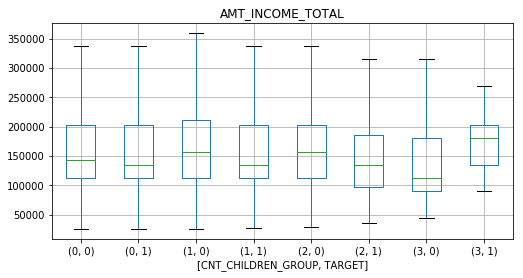

In [102]:
#2-2

plt_column = ["AMT_INCOME_TOTAL"]
plt_by =["CNT_CHILDREN_GROUP", "TARGET"]

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(8,4))
plt.suptitle('')
plt.show()

In [130]:
#3

grp = ["CNT_CHILDREN_GROUP", "TARGET"]

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
data = grouped_df.describe()
data = data.loc[:,["mean", "std"]]
data = np.array([data.iloc[i,:].values for i in range(8)])
data

app_train["AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET"] = 0
for i in range(len(app_train.CNT_CHILDREN_GROUP.unique())):
    for j in range(len(app_train.TARGET.unique())):
        app_train["AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET"][(app_train.CNT_CHILDREN_GROUP==i) & (app_train.TARGET==j)] = (app_train.AMT_INCOME_TOTAL - data[2*i+j][0]) / data[2*i+j][1]

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

c:\python36\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.491521
1,270000.0,0.972434
2,67500.0,-0.934706
3,135000.0,-0.298993
4,121500.0,-0.426135
